In [1]:
import csv

import numpy as np
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report, accuracy_score, average_precision_score, precision_score, recall_score, make_scorer, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing, datasets
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import scipy.stats as stat
from sklearn.utils import resample
import random
import sys
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import RandomizedSearchCV
import itertools
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import io
from sklearn.utils import shuffle
import seaborn as sns
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("../data.csv")

In [3]:
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [4]:
df["year"] = df["year"] // 10 * 10

<AxesSubplot:xlabel='year'>

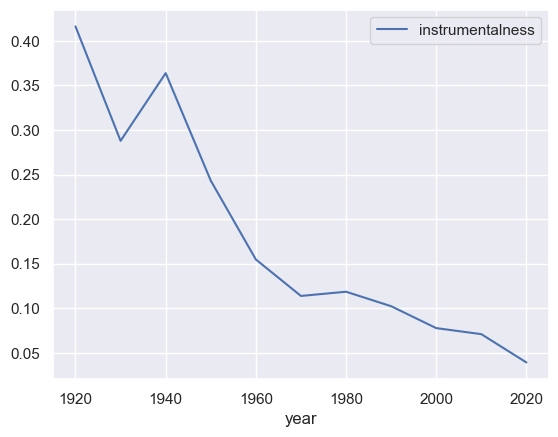

In [5]:
df.groupby('year')['instrumentalness'].mean().plot(legend=True)

<AxesSubplot:xlabel='year'>

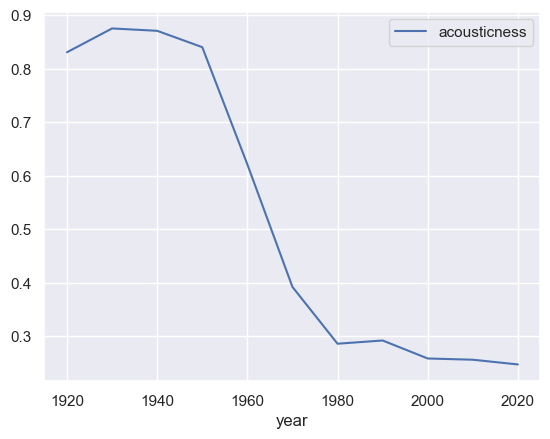

In [6]:
df.groupby('year')['acousticness'].mean().plot(legend=True)

<AxesSubplot:xlabel='year'>

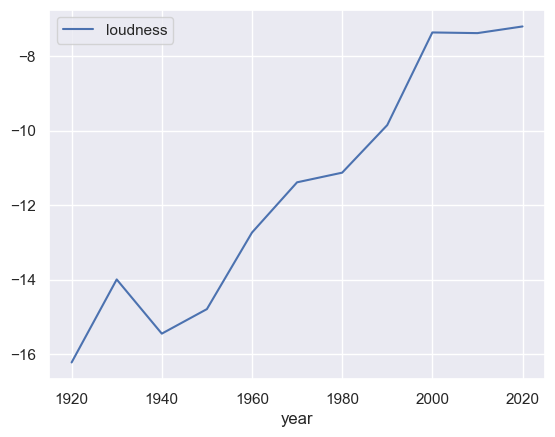

In [7]:
df.groupby('year')['loudness'].mean().plot(legend=True)

<AxesSubplot:xlabel='year'>

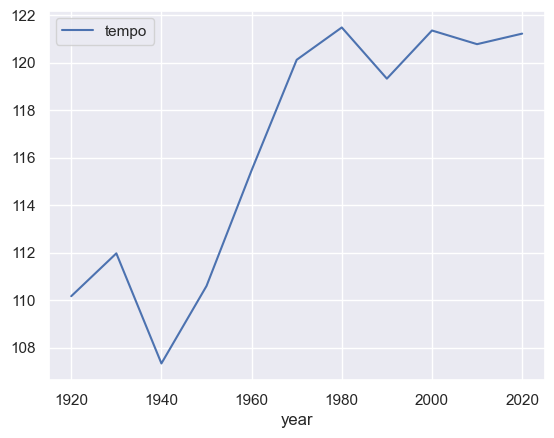

In [8]:
df.groupby('year')['tempo'].mean().plot(legend=True)

<AxesSubplot:xlabel='year'>

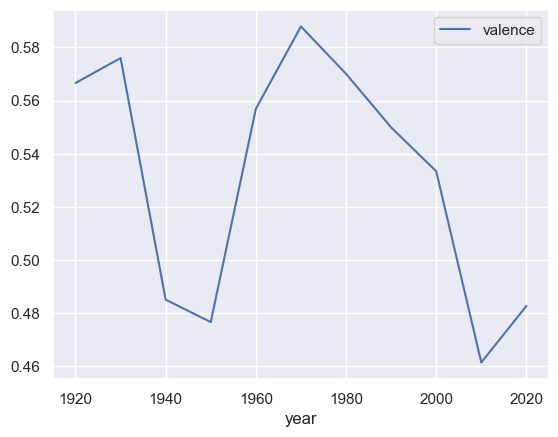

In [9]:
df.groupby('year')['valence'].mean().plot(legend=True)

<AxesSubplot:xlabel='year'>

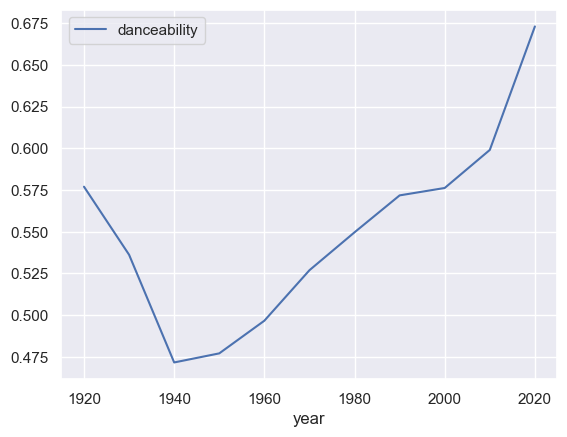

In [10]:
df.groupby('year')['danceability'].mean().plot(legend=True)

<AxesSubplot:xlabel='year'>

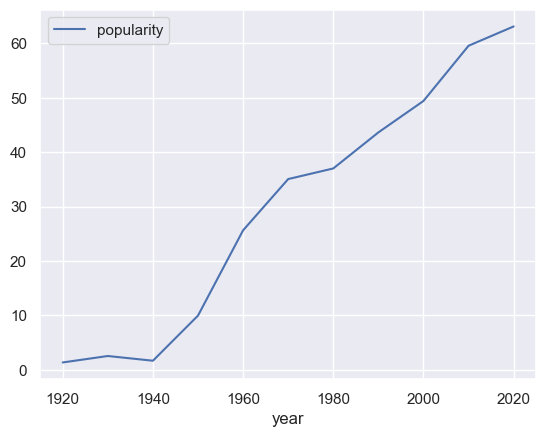

In [11]:
df.groupby('year')['popularity'].mean().plot(legend=True)

<AxesSubplot:xlabel='year'>

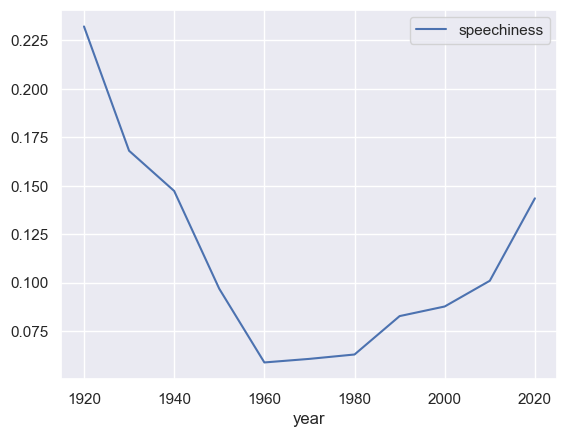

In [12]:
df.groupby('year')['speechiness'].mean().plot(legend=True)

In [13]:
francisco = df[df['year'] == 1920][df['artists'].str.contains('Francisco Canaro')]
francisco

/var/folders/ys/76yn_3qx7g33rlx42fjhwkpr0000gn/T/ipykernel_1000/553364797.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  francisco = df[df['year'] == 1920][df['artists'].str.contains('Francisco Canaro')]


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.720,1920
8,0.995,"['Francisco Canaro', 'Charlo']",0.683,162493,0.2070,0,6OaJ8Bh7lsBeYoBmwmo2nh,0.206000,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0,1928-10-03,0.1270,119.833,0.493,1920
17,0.994,"['Francisco Canaro', 'Luis Scalon']",0.787,167107,0.1560,0,6TFuAErGpJ9FpxQQ1HC8nM,0.659000,4,0.1100,-14.056,0,Invocación al Tango - Remasterizado,0,1928-09-16,0.1570,117.167,0.849,1920
19,0.992,['Francisco Canaro'],0.763,173707,0.1320,0,6Ukl7n0q3Cjd0Og8uBmVeP,0.069300,4,0.1120,-13.002,1,Tendrás Que Llorar Conmigo - Instrumental (Rem...,0,1928-09-17,0.0886,111.679,0.832,1920
21,0.990,['Francisco Canaro'],0.833,176000,0.1320,0,6VGWQU6XIXshFT288CoLrk,0.000568,1,0.0957,-11.131,1,Quisiste Cachar un Gil - Instrumental (Remaste...,0,1928-09-20,0.2950,121.779,0.568,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161645,0.994,['Francisco Canaro'],0.646,173000,0.0679,0,6A2GlLod02iMgDj9m1vI19,0.771000,11,0.1100,-19.359,1,Cinta Azul - Instrumental (Remasterizado),0,1928-09-21,0.0779,113.200,0.768,1920
161646,0.995,['Francisco Canaro'],0.744,175213,0.0921,0,6AAifpN1JDX7oVvugH5YIR,0.678000,0,0.1080,-15.104,1,Hipolito Hiriguyen - Instrumental (Remasterizado),0,1928-09-17,0.0820,116.893,0.835,1920
161649,0.995,['Francisco Canaro'],0.824,202493,0.1880,0,6AumGDetvv4IJhXPPe9ZWu,0.617000,4,0.1080,-17.042,1,Mis Besos - Instrumental (Remasterizado),0,1928-09-24,0.1190,115.364,0.758,1920
161672,0.994,['Francisco Canaro'],0.688,201507,0.2250,0,7x9XVySn2GDXUqGOPuKijm,0.343000,9,0.1880,-9.992,1,Misa de Once - Remasterizado,0,1929-10-22,0.1060,115.042,0.714,1920


In [14]:
print(francisco['loudness'].mean())
print(francisco['danceability'].mean())

-13.465323618090455
0.6843597989949738


In [15]:
swift = df[df['year'] == 2010][df['artists'].str.contains('Taylor Swift')]
swift

/var/folders/ys/76yn_3qx7g33rlx42fjhwkpr0000gn/T/ipykernel_1000/2848308248.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  swift = df[df['year'] == 2010][df['artists'].str.contains('Taylor Swift')]


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7093,0.03600,['Taylor Swift'],0.418,317947,0.680,0,6XDBA3QWX51lDJ0oZbaJJN,0.000076,7,0.1080,-4.300,1,Long Live,47,2010-10-25,0.0346,204.125,0.1420,2010
7117,0.18600,['Taylor Swift'],0.552,302253,0.608,0,3kfgJql90tzgoxByioAMXR,0.000000,1,0.1250,-5.290,0,Innocent,47,2010-10-25,0.0259,134.050,0.1700,2010
7121,0.16600,['Taylor Swift'],0.589,403920,0.470,0,7hZuICN5eaCuQyp443RCt6,0.000001,4,0.1120,-5.320,1,Dear John,46,2010-10-25,0.0280,119.386,0.1020,2010
7152,0.02680,['Taylor Swift'],0.582,275960,0.765,0,2R7C9dDqv1UPycvepBFziA,0.000002,7,0.1030,-3.648,1,Superman,46,2010-10-25,0.0324,131.982,0.5590,2010
7350,0.66400,['Taylor Swift'],0.626,323080,0.118,0,5G9AVKld9q7DCrmoY42raf,0.000169,7,0.1270,-15.910,1,State Of Grace - Acoustic Version,48,2012-10-22,0.0305,105.597,0.0682,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169228,0.00364,['Taylor Swift'],0.765,247533,0.656,0,6wfugRLamFsTRbPcCpNnP7,0.008680,5,0.0918,-6.112,1,How You Get The Girl,52,2014-10-27,0.0504,119.997,0.5450,2010
169304,0.01580,['Taylor Swift'],0.653,207440,0.893,0,1B5VzXPqMlvRw0U4HJY3dJ,0.000049,0,0.1020,-5.966,1,I Wish You Would,51,2014-10-27,0.0538,118.035,0.5130,2010
169307,0.24500,['Taylor Swift'],0.602,195707,0.755,0,2zfgVd034GlUvk7LqBHl6u,0.000000,0,0.1780,-4.991,1,I Know Places,51,2014-10-27,0.0710,159.965,0.4950,2010
169586,0.06040,['Taylor Swift'],0.624,211507,0.691,0,7I7JbDv63ZJJsSi24DyJrz,0.000011,0,0.1380,-6.686,0,Dancing With Our Hands Tied,65,2017-11-10,0.1960,160.024,0.2840,2010


In [16]:
print(swift['loudness'].mean())
print(swift['danceability'].mean())

-6.466398648648648
0.6147499999999999


## Machine Learning

In [17]:
train_val, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train_val, test_size=0.25)

In [18]:
X_train = train[['instrumentalness','valence', 'loudness', 'speechiness', 'tempo', 'danceability', 'acousticness']]
y_train = train[['popularity']]

In [19]:
X_val = val[['instrumentalness','valence', 'loudness', 'speechiness', 'tempo', 'danceability', 'acousticness']]
y_val = val[['popularity']]

In [20]:
X_test = test[['instrumentalness','valence', 'loudness', 'speechiness', 'tempo', 'danceability', 'acousticness']]
y_test = test[['popularity']]

In [21]:
def performanceMetrics(X, y, model):
    y_proba = model.predict_proba(X)[:,1]
    y_pred = model.predict(X)

    auroc = roc_auc_score(y, y_proba)

    ap = average_precision_score(y, y_proba)

    mix_auroc_auprc = np.sqrt(roc_auc_score(y, y_proba)*average_precision_score(y, y_proba))

    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)

    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

    specificity = tn / (tn+fp)

    ppv = tp / (tp + fp)

    npv = tn / (tn + fn)

    f1 = f1_score(y, y_pred)

    accuracy = accuracy_score(y, y_pred)

    return [auroc, ap, mix_auroc_auprc, precision, recall, specificity, ppv, npv, tn, fp, fn, tp, f1, accuracy]

In [22]:
def HPOptimize(clf, par, trainX, trainY, valX, valY, name):

    #Remember, this function returns a function -- yay for functional progrmaming, finally get to use the stuff I learned in that class lmao.
    def customLoss(true, pred):
        return accuracy_score(true, pred)

    cv = RandomizedSearchCV(clf, par, cv=5,  verbose=4, scoring=make_scorer(customLoss, greater_is_better=True, needs_proba=True), refit=True, n_jobs=-1, n_iter=1)

    # cv = GridSearchCV(clf, par, cv=5,  verbose=4, scoring=make_scorer(customLoss, greater_is_better=True, needs_proba=True), refit=True, n_jobs=-1)
    search = cv.fit(trainX, trainY)
    topModel = search.best_estimator_
    topParams = search.best_params_



    paramDict = search.cv_results_


    calibrated_clf = CalibratedClassifierCV(base_estimator=topModel, cv=5, method='isotonic')
    cal_model = calibrated_clf.fit(trainX, trainY)

    #Test Set Performance: AUROC, precision, recall
    performance = performanceMetrics(valX, valY, cal_model)
    customScore = performance[-1]

    y_score = cal_model.predict_proba(valX)
    precisionArr, recallArr, _ = precision_recall_curve(valY, y_score[:,1])

    fprArr, tprArr, _ = roc_curve(valY, y_score[:,1])

    return cal_model, topParams, customScore, performance, precisionArr, recallArr, fprArr, tprArr, name, paramDict

In [23]:
# modelLR, paramsLR, customScoreLR, performanceLR, precisionArrLR, recallArrLR, fprArrLR, tprArrLR, nameLR, paramDictLR = HPOptimize(LogisticRegression(solver='saga', max_iter=500, l1_ratio=0.5), {'penalty':('l1','l2','elasticnet','none'),'C':np.linspace(0.1,10,50)}, X_train, y_train, X_val, y_val, "Logistic Regression")

In [24]:
# modelRF, paramsRF, customScoreRF, performanceRF, precisionArrRF, recallArrRF, fprArrRF, tprArrRF,nameRF, paramDictRF = HPOptimize(RandomForestClassifier(), {'n_estimators':np.linspace(100,1000,100, dtype = int, endpoint=False)}, X_train, y_train, X_val, y_val, "Random Forest")

In [25]:
# modelKNN, paramsKNN, customScoreKNN, performanceKNN, precisionArrKNN, recallArrKNN, fprArrKNN, tprArrKNN, nameKNN, paramDictKNN = HPOptimize(KNeighborsClassifier(), {'n_neighbors':np.linspace(1,20,10, dtype=int)}, X_train, y_train, X_val, y_val, "K-Nearest Neighbors")

In [26]:
# modelXGBoost, paramsXGBoost, customScoreXGBoost, performanceXGBoost, precisionArrXGBoost, recallArrXGBoost, fprArrXGBoost, tprArrXGBoost, nameXGBoost, paramDictXGBoost = HPOptimize(XGBClassifier(verbose=False, warm_start=True), {'max_depth': range (2, 10, 10), 'n_estimators': range(60, 220, 40), 'learning_rate': [0.1, 0.01, 0.05]}, X_train, y_train, X_val, y_val, "XGBoost")

In [27]:
# modelSVC, paramsSVC, customScoreSVC, performanceSVC, precisionArrSVC, recallArrSVC, fprArrSVC, tprArrSVC, nameSVC, paramDictSVC = HPOptimize(SVC(probability=True, verbose=False), {'class_weight':[{1: w} for w in np.linspace(5,50,10)],'kernel':('poly','rbf','sigmoid'),'gamma':np.logspace(-5,2,5),'max_iter':[10000]}, X_train, y_train, X_val, y_val, "Support Vector Classifier")

In [28]:
# gnb = GaussianNB()
# pre_cal_NB = gnb.fit(X_train, y_train)

# calibrated_clf = CalibratedClassifierCV(base_estimator=pre_cal_NB, cv=5, method='isotonic')
# modelNB = calibrated_clf.fit(X_train, y_train)
# pred = modelNB.predict_proba(X_val)[:,1]
# customScoreNB, performanceNB,  = roc_auc_score(y_val, pred), performanceMetrics(X_val, y_val, modelNB)
# precisionArrNB, recallArrNB, _ = precision_recall_curve(y_val, modelNB.predict_proba(X_val)[:,1])
# fprArrNB, tprArrNB, _ = roc_curve(y_val, modelNB.predict_proba(X_val)[:,1])
# nameNB = "Naive Bayes"

In [29]:
# modelMLP, paramsMLP, customScoreMLP, performanceMLP, precisionArrMLP, recallArrMLP, fprArrMLP, tprArrMLP, nameMLP, paramDictMLP = HPOptimize(MLPClassifier(warm_start=True, verbose=False), {'activation':('identity', 'logistic', 'tanh', 'relu'), 'hidden_layer_sizes':[(10,30,10),(20,)], 'solver':['sgd','adam'], 'alpha':[0.0001, 0.05], 'learning_rate':['constant', 'adaptive'],"max_iter": [500, 1000, 5000]}, X_train, y_train, X_val, y_val, "Multi Layer Perceptron Classifier")

In [30]:
# modelList = [modelLR, modelSVC, modelRF, modelKNN, modelXGBoost, modelNB, modelMLP]
# paramsList = [paramsLR, paramsSVC, paramsRF, paramsKNN, paramsXGBoost, paramsMLP]
# customScoreList = [customScoreLR, customScoreSVC, customScoreRF, customScoreKNN, customScoreXGBoost, customScoreNB, customScoreMLP]
# performanceList = [performanceLR, performanceSVC, performanceRF, performanceKNN, performanceXGBoost, performanceNB, performanceMLP]
# paramDictList = [paramDictLR, paramDictSVC, paramDictRF, paramDictKNN, paramDictXGBoost, paramDictMLP]
# precisionArrList = [precisionArrLR, precisionArrSVC, precisionArrRF, precisionArrKNN, precisionArrXGBoost, precisionArrNB, precisionArrMLP]
# recallArrList = [recallArrLR, recallArrSVC, recallArrRF, recallArrKNN, recallArrXGBoost, recallArrNB, recallArrMLP]
# fprArrList = [fprArrLR, fprArrSVC, fprArrRF, fprArrKNN, fprArrXGBoost, fprArrNB, fprArrMLP]
# tprArrList = [tprArrLR, tprArrSVC, tprArrRF, tprArrKNN, tprArrXGBoost, tprArrNB, tprArrMLP]
# nameList =  [nameLR, nameSVC, nameRF, nameKNN, nameXGBoost, nameNB, nameMLP]

In [31]:
# bestModel, bestModelName, testPerformance, precisionArrTest, recallArrTest, fprArrTest, tprArrTest = choose_best(customScoreLR, modelLR, customScoreSVC, modelSVC,
#                                                                                                         customScoreRF, modelRF, customScoreKNN, modelKNN, customScoreXGBoost,
#                                                                                                         modelXGBoost, customScoreNB, modelNB, customScoreMLP, modelMLP, "popularity", X_test, y_test, "Accuracy")

In [32]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5)
